## <center> Bài tập Biến hình và Xử lý ảnh </center>

Họ và Tên: Huỳnh Nguyễn Thế Dân

MSSV: 21110256

Lớp: 21TTH1

In [35]:
import os
def ConnectToDataFolder(FolderPath):
  print("=" * 80, "- Begin: ConnectToDataFolder")
  
  if (os.path.isdir(FolderPath)):
    os.chdir(FolderPath)
    print("List of Data in the Folder :")
    display(os.listdir())
  else:
    print(f"{FolderPath} is not correct, please check the folder again")
  
  print("=" * 80, "- Finish: ConnectToDataFolder")

In [36]:
def GetSubFiles(dir, ExtensionList = []):
    print("=" * 80, "- Begin: GetSubFiles")

    "Get a list of immediate subfiles"
    all_names = next(os.walk(dir))[2]
    subfile_names = []
    if(len(ExtensionList) > 0):
      for filename in all_names:
        fname, fextension = os.path.splitext(filename)
        if any(ext in fextension for ext in ExtensionList):
          subfile_names.append(dir + "/" + filename)
    else:
      subfile_names = [dir + "/" + x for x in all_names]
    
    print(f"There are {len(subfile_names)} files are found")
    subfile_names.sort()
    print("Here is some samples :")
    [print(x) for x in subfile_names[0: min(len(subfile_names), 5)]]

    print("=" * 80, "- End: GetSubFiles")
    return subfile_names

In [37]:
from matplotlib import pyplot as plt 
import matplotlib.gridspec as gridspec

def ShowImage(ImageList, nRows = 1, nCols = 2, ImageTitleList = []):    
    gs = gridspec.GridSpec(nRows, nCols)     
    plt.figure(figsize=(20,20))
    for i in range(len(ImageList)):
        ax = plt.subplot(gs[i])
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_aspect('equal')

        plt.subplot(nRows, nCols, i+1)

        image = ImageList[i].copy()
        if (len(image.shape) < 3):
            plt.imshow(image, plt.cm.gray)
        else:
            plt.imshow(image)
        if(len(ImageTitleList)  > 0):
          plt.title("Image " + str(ImageTitleList[i]))
        else:
          plt.title("Image " + str(i))

        plt.axis('off')

    plt.show()

In [38]:
import random
from pylab import imread

def ShowRandomImage(DatasetFiles, nRows = 1, nCols = 5, seedNo = 10):
    print("=" * 80, "- Begin: ShowRandomImage")

    nFile = nRows * nCols

    random.seed(seedNo)
    FileNameList = random.sample(DatasetFiles, nFile)
    ImageList = []
    for filepath in FileNameList:
        image_RGB = imread(filepath)
        ImageList.append(image_RGB)
    
    ShowImage(ImageList, nRows, nCols, FileNameList)

    print("=" * 80, "- Finish: ShowRandomImage")
    return FileNameList, ImageList

In [39]:
from skimage.transform import rescale, resize
import cv2 
 
def ResizeImage(image, wresize = 0, hresize = 0):
    OrigWidth, OrigHeight = float(image.shape[1]), float(image.shape[0])

    if((wresize == 0) & (hresize == 0)):
        return image
    if(wresize == 0):
        wresize = int((OrigWidth * hresize)/OrigHeight)
    if(hresize == 0):
        hresize = int((OrigHeight * wresize)/OrigWidth)
    resize_image = cv2.resize(image, (wresize, hresize), interpolation = cv2.INTER_NEAREST) 
    return resize_image

In [40]:
def ConvertColorSpaces(image, ColorSpace = "GRAY", display = 1):
  ImageTitleList = ["RGB", ColorSpace]

  if(ColorSpace.upper() == "HSV"):
    image_convert = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    ChannelList = ["Chrominance Hue" , "Chrominance Saturation", "Luminance Value"]
  elif(ColorSpace.upper() == "YCRCB"):
    image_convert = cv2.cvtColor(image, cv2.COLOR_BGR2YCR_CB)
    ChannelList = ["Chrominance Red" , "Chrominance Blue", "Luminance Y"]
  elif(ColorSpace.upper() == "LAB"):
    image_convert = cv2.cvtColor(image, cv2.COLOR_RGB2YCR_CB)
    ChannelList = ["Chrominance a(Green To Red)" , "Chrominance b(Blue To Yellow)", "Luminance L"]
  else:
    image_convert = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

  if(display):
    if(len(image_convert.shape) == 3):  
      ShowImage([image, image_convert, image_convert[:,:,0], image_convert[:,:,1], image_convert[:,:,2]], 1, 5, 
                ImageTitleList + ChannelList)
    else:
      ShowImage([image, image_convert], 1, 5, ImageTitleList)

  return image_convert

In [41]:
import matplotlib.pyplot as plt
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

def ShowHistogram(image, Title = "Color Histogram", ChannelList = ["Channel 1", "Channel 2", "Channel 3"]):
  fig, ax = plt.subplots(figsize=(20, 10))

  if(len(image.shape) == 3):
    color = ('r', 'g', 'b')
    for channel,col in enumerate(color):
        histr = cv2.calcHist([image],[channel],None,[256],[0,256])
        ax.plot(histr,color = col, label = ChannelList[channel])
        
    plt.title(Title)
    plt.legend()
  else:
    histr = cv2.calcHist([image],[0],None,[256],[0,256])
    plt.plot(histr,color = "gray", label = "Gray")
    plt.title("Gray Histogram")
    plt.legend()

  # Set axis ranges; by default this will put major ticks every 25.
  ax.set_xlim(0, 255)

  # Change major ticks to show every 20.
  ax.xaxis.set_major_locator(MultipleLocator(20))

  # Change minor ticks to show every 5. (20/4 = 5)
  ax.xaxis.set_minor_locator(AutoMinorLocator(4))

  # Turn grid on for both major and minor ticks and style minor slightly
  # differently.
  ax.grid(which='major', color='#CCCCCC', linestyle='--')
  ax.grid(which='minor', color='#CCCCCC', linestyle=':')
  plt.show()

In [42]:
import numpy as np

def SegmentByThresh(image, channel, segment_range = [], display = 1):
  if(len(segment_range) == 0):
    thresh, image_mask = cv2.threshold(channel,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    print(f"Otsu Threshold : {thresh}")
  else:
    image_mask = ((channel > segment_range[0]) & (channel < segment_range[1]))

  image_segment = cv2.bitwise_and(image, image, mask = image_mask.astype(np.uint8))

  ImageTitleList = ["Color Image", "Segmented Channel", "Segmented Mask", "Segmented Color Image"]
  if(display):
    ShowImage([image, channel, image_mask, image_segment], 1, 5, ImageTitleList)

  image_mask = image_mask.astype(bool)
  return image_mask

In [43]:
import skimage
from skimage import measure

def GetLargestBinaryArea(image, image_mask, display = 1):
  labels_mask = measure.label(image_mask)                       
  regions = measure.regionprops(labels_mask)
  regions.sort(key=lambda x: x.area, reverse=True)
  if len(regions) > 1:
      for rg in regions[1:]:
          labels_mask[rg.coords[:,0], rg.coords[:,1]] = 0
  labels_mask[labels_mask!=0] = 1
  image_mask = labels_mask
  
  image_segment = cv2.bitwise_and(image, image, mask = image_mask.astype(np.uint8))
  ImageTitleList = ["Color Image", "Segmented Mask", "Segmented Color Image"]
  
  if(display):
    ShowImage([image, image_mask, image_segment], 1, 5, ImageTitleList)

  return image_mask

In [44]:
from skimage.measure import label, regionprops
from skimage.segmentation import mark_boundaries

def LabelObjectByMask(image_input, image_mask, type = "BBox", color = (0,255,0)):
    image_output = image_input.copy()

    Marker_Size = int(AnImage.shape[0] * 0.1)
    Marker_Thick = int(AnImage.shape[0] * 0.01)
    BBoxThick = int(AnImage.shape[0] * 0.01)
    ContourThick = int(AnImage.shape[0] * 0.01)

    label_img = label(image_mask)
    regions = regionprops(label_img)
    for props in regions:
        minr, minc, maxr, maxc = props.bbox
        left_top = (minc, minr)
        right_bottom = (maxc, maxr)
        at_row, at_col = props.centroid

        if(type == "BBox"):
          cv2.rectangle(image_output,left_top, right_bottom, color ,BBoxThick)

        if(type == "Boundary"):
          contours, heirarchy = cv2.findContours(image_mask.astype(np.uint8), cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
          cv2.drawContours(image_output, contours, -1, color, ContourThick)
          cv2.drawMarker(image_output, (int(at_col), int(at_row)),color, markerType=cv2.MARKER_STAR, 
                           markerSize= Marker_Size, thickness= Marker_Thick, line_type=cv2.LINE_AA)
          
        if(type == "Fill"):
          image_output[image_mask > 0] = color
            
    return image_output

In [45]:
def IntensityTransformation(image, gamma = 0.3, display = 1):
  image_gamma_corrected = np.array(255*(image / 255) ** gamma, dtype = 'uint8')
  ShowImage([image, image_gamma_corrected], 1, 5, ["Original Image", f"Gamma = {gamma}"])
  if(display):
    GammaImageList = []
    TitleList = []
  
    for g in [0.3, 0.5, 0.9,  1.2, 2.2]:
      # Apply gamma correction.
      gamma_corrected = np.array(255*(image / 255) ** g, dtype = 'uint8')
      GammaImageList.append(gamma_corrected)
      TitleList.append(f"Gamma = {g}")

    ShowImage(GammaImageList, 1, 5, TitleList)
  return image_gamma_corrected

In [46]:
from skimage.morphology import (erosion, dilation, opening, closing, white_tophat)
from skimage.morphology import black_tophat, skeletonize, convex_hull_image  
from skimage.morphology import disk
from scipy import ndimage

# Morphology 
def Morphology(image, image_mask, morType = "erosion", size = 3, display = 1):
  image_mask = image_mask.astype(np.uint8)
  kernel = disk(abs(size))

  if(morType == "erosion"):
    result = erosion(image_mask, kernel)
  if(morType == "dilation"):
    result = dilation(image_mask, kernel)
  if(morType == "opening"):
    result = opening(image_mask, kernel)
  if(morType == "closing"):
    result = closing(image_mask, kernel)
  if(morType == "gradient"):
    result = cv2.morphologyEx(image_mask, cv2.MORPH_GRADIENT, kernel)
  if(morType == "tophat"):
    result = white_tophat(image_mask, kernel)
  if(morType == "blackhat"):
    result = black_tophat(image_mask, kernel)
  if(morType == "fillhole"):
    result = ndimage.binary_fill_holes(image_mask).astype(int)
  if(morType == "skeleton"):
    result = skeletonize(image_mask == 1)
  if(morType == "convexhull"):
    result = convex_hull_image(image_mask == 1)

  if(display):
    image_mask_color = cv2.bitwise_and(image, image, mask = result.astype(np.uint8))

    im_erosion = erosion(image_mask, kernel)
    im_dilation = dilation(image_mask, kernel)
    im_opening = opening(image_mask, kernel)
    im_closing = closing(image_mask, kernel)
    im_gradient = cv2.morphologyEx(image_mask, cv2.MORPH_GRADIENT, kernel)
    im_tophat = white_tophat(image_mask, kernel)
    im_blackhat = black_tophat(image_mask, kernel)
    im_fillhole = ndimage.binary_fill_holes(image_mask).astype(int)
    im_skeleton = skeletonize(image_mask == 1)
    im_convexhull = convex_hull_image(image_mask == 1)

    ShowImage([image, result, image_mask_color], 1, 5, ImageTitleList= ["Color Image", "Mask", "Segment By Mask"])
    ShowImage([im_erosion, im_dilation, im_opening, im_closing, im_gradient], 1, 5, 
              ImageTitleList= ["Erosion", "Dilation", "Opening", "Closing", "Gradient"])
    ShowImage([im_tophat, im_blackhat, im_fillhole, im_skeleton, im_convexhull], 1, 5, 
              ImageTitleList= ["Tophat", "BlackHat", "FillHole", "Skeleton", "Convexhull"])
    
  result = result.astype(bool)
  return result

In [47]:
import numpy as np
def ConcatImage(ImageList, CombineType = "h", display = 1):
  if(CombineType == "h"):
    result = np.concatenate(ImageList, axis=1)
  else:
    result = np.concatenate(ImageList, axis=0)
  
  if(display):
    ShowImage([result], 1, 1)

  result = np.uint8(result)
  return result

In [48]:
from pathlib import Path
    
def GenerateOutput(image, image_mask, FilePath = "", SaveFolderPath = ""):
  image_output_rgbmask = cv2.merge([image_mask*255, image_mask*255, image_mask*255])
  image_output_fill = LabelObjectByMask(image, image_mask, type = "Fill", color = (255,0,0))
  image_output_bbox = LabelObjectByMask(image, image_mask, type = "BBox", color = (255,0,0))
  image_output_boundary = LabelObjectByMask(image, image_mask, type = "Boundary", color = (255,0,0))

  DemoImage1 = ConcatImage([image_output_rgbmask, image_output_fill], display= 0)
  DemoImage2 = ConcatImage([image_output_bbox, image_output_boundary], display= 0)
  DemoImage = ConcatImage([DemoImage1, DemoImage2], CombineType = "v", display= 0)

  if(len(FolderPath) > 0):
    filename = Path(FilePath).stem
    print(f"Already Save Results to Folder {SaveFolderPath}")
    
    print(f'{SaveFolderPath}/{filename}_rgbmask.jpg')
    cv2.imwrite(f'{SaveFolderPath}/{filename}_mask.jpg', image_output_rgbmask)

    print(f'{SaveFolderPath}/{filename}_demo.jpg')
    cv2.imwrite(f'{SaveFolderPath}/{filename}_demo.jpg', cv2.cvtColor(DemoImage, cv2.COLOR_RGB2BGR))

  return image_output_rgbmask, image_output_fill, image_output_bbox, image_output_boundary, DemoImage

In [49]:
def doCoconutMaskSegment(AnImage, image_mask, display = 1):
  MaskList = []
  MaskList.append(image_mask)
  image_mask_adjust = Morphology(AnImage, image_mask, morType = "fillhole", size = 8, display = 0)
  MaskList.append(image_mask_byauto)
  image_mask_adjust = Morphology(AnImage, image_mask_adjust, morType = "erosion", size = 8, display = 0)
  MaskList.append(image_mask_adjust)
  image_mask_adjust = GetLargestBinaryArea(AnImage, image_mask_adjust, display = 0)
  MaskList.append(image_mask_adjust)
  image_mask_adjust = Morphology(AnImage, image_mask_adjust, morType = "dilation", size = 10, display = 0)
  MaskList.append(image_mask_adjust)
  
  if(display):
    ShowImage(MaskList, 1, 5)
  
  return image_mask_adjust

In [50]:
def doCoconutMaskSegment2(AnImage, image_mask, display = 1):
  MaskList = []
  MaskList.append(image_mask)
  image_mask_adjust = Morphology(AnImage, image_mask, morType = "fillhole", size = 8, display = 0)
  MaskList.append(image_mask_adjust)
  image_mask_adjust = Morphology(AnImage, image_mask_adjust, morType = "erosion", size = 50, display = 0)
  MaskList.append(image_mask_adjust)
  image_mask_adjust = GetLargestBinaryArea(AnImage, image_mask_adjust, display = 0)
  MaskList.append(image_mask_adjust)
  image_mask_adjust = Morphology(AnImage, image_mask_adjust, morType = "dilation", size = 50, display = 0)
  MaskList.append(image_mask_adjust)
  
  if(display):
    ShowImage(MaskList, 1, 5)
  
  return image_mask_adjust

## 1/ Thực hiện các bước để segment đối tượng trái cam fresh và rotten 

### Observations

In [51]:
FolderPath = "/PERSONAL/courses/Bien_hinh_va_Xu_ly_anh/Object-Transformation-and-Segmentation-Applications/lab/Feature_Extraction"
ConnectToDataFolder(FolderPath)

================================================================================ - Begin: ConnectToDataFolder
List of Data in the Folder :


['21110256_HuynhNguyenTheDan_ IS Lab02.ipynb', 'Orange']

================================================================================ - Finish: ConnectToDataFolder


In [52]:
DatasetFiles = GetSubFiles("Orange", ExtensionList = ["png"])
print(DatasetFiles)

================================================================================ - Begin: GetSubFiles
There are 40 files are found
Here is some samples :
Orange/FreshOrange01.png
Orange/FreshOrange02.png
Orange/FreshOrange03.png
Orange/FreshOrange04.png
Orange/FreshOrange05.png
================================================================================ - End: GetSubFiles
['Orange/FreshOrange01.png', 'Orange/FreshOrange02.png', 'Orange/FreshOrange03.png', 'Orange/FreshOrange04.png', 'Orange/FreshOrange05.png', 'Orange/FreshOrange06.png', 'Orange/FreshOrange07.png', 'Orange/FreshOrange08.png', 'Orange/FreshOrange09.png', 'Orange/FreshOrange10.png', 'Orange/FreshOrange11.png', 'Orange/FreshOrange12.png', 'Orange/FreshOrange13.png', 'Orange/FreshOrange14.png', 'Orange/FreshOrange15.png', 'Orange/FreshOrange16.png', 'Orange/FreshOrange17.png', 'Orange/FreshOrange18.png', 'Orange/FreshOrange19.png', 'Orange/FreshOrange20.png', 'Orange/RottenOrange01.png', 'Orange/RottenOrange02.png', 'O

================================================================================ - Begin: ShowRandomImage


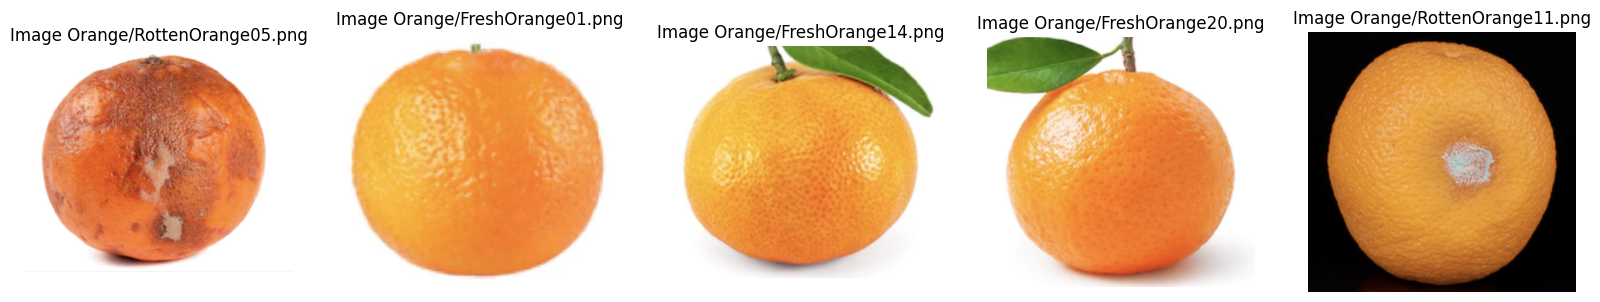

================================================================================ - Finish: ShowRandomImage


In [53]:
FileNameList, ImageList = ShowRandomImage(DatasetFiles, seedNo = 25)

### Segmentation on Specific Image by Hand Craft

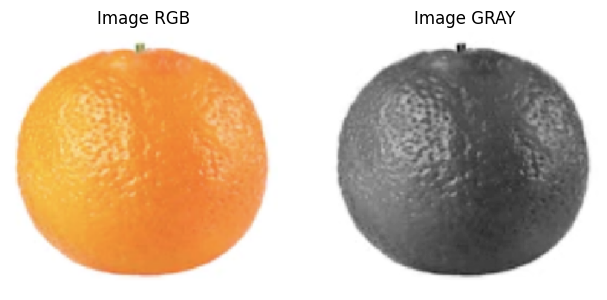

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


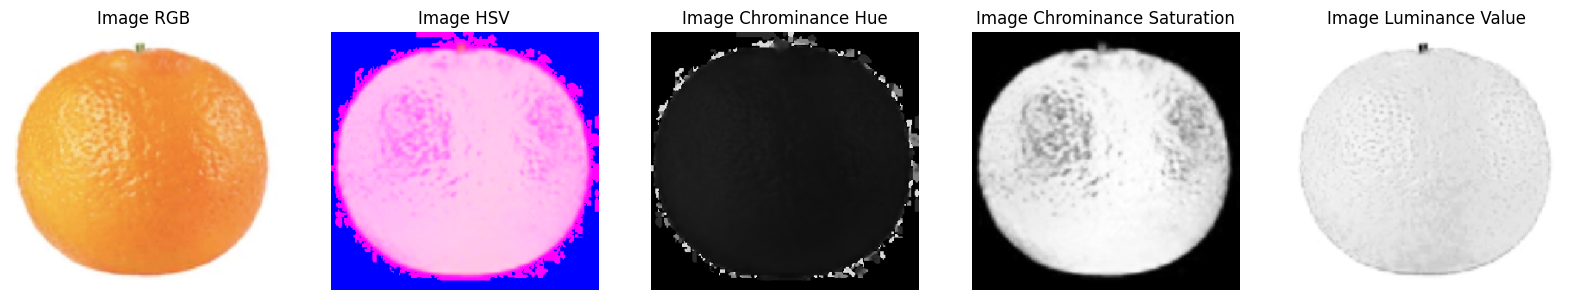

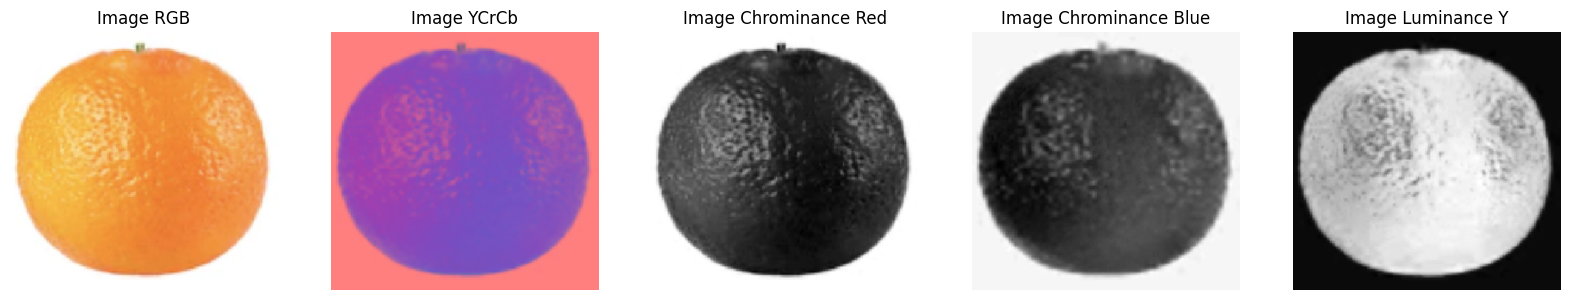

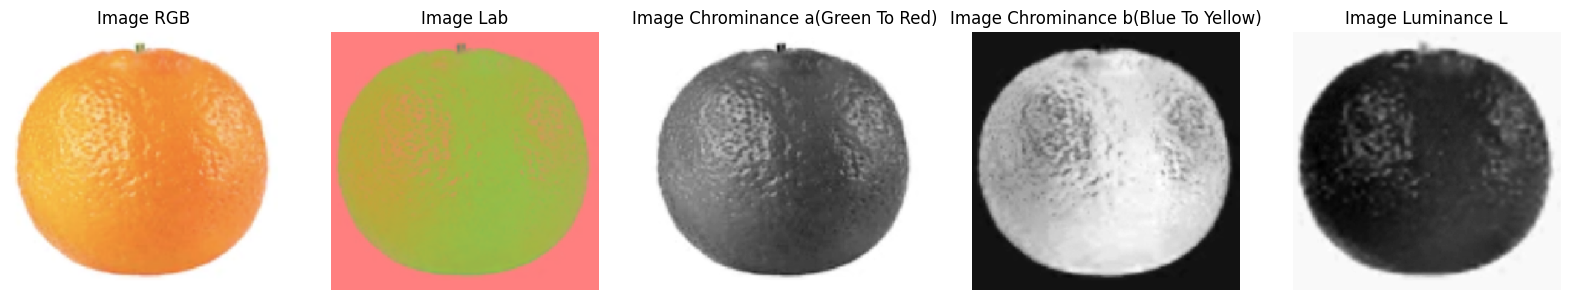

In [68]:
AnImage = ResizeImage(ImageList[1], 0, 300)
image_gray = ConvertColorSpaces(AnImage, ColorSpace = "GRAY")
image_hsv = ConvertColorSpaces(AnImage, ColorSpace = "HSV")
image_ycrcb = ConvertColorSpaces(AnImage, ColorSpace = "YCrCb")
image_lab = ConvertColorSpaces(AnImage, ColorSpace = "Lab")

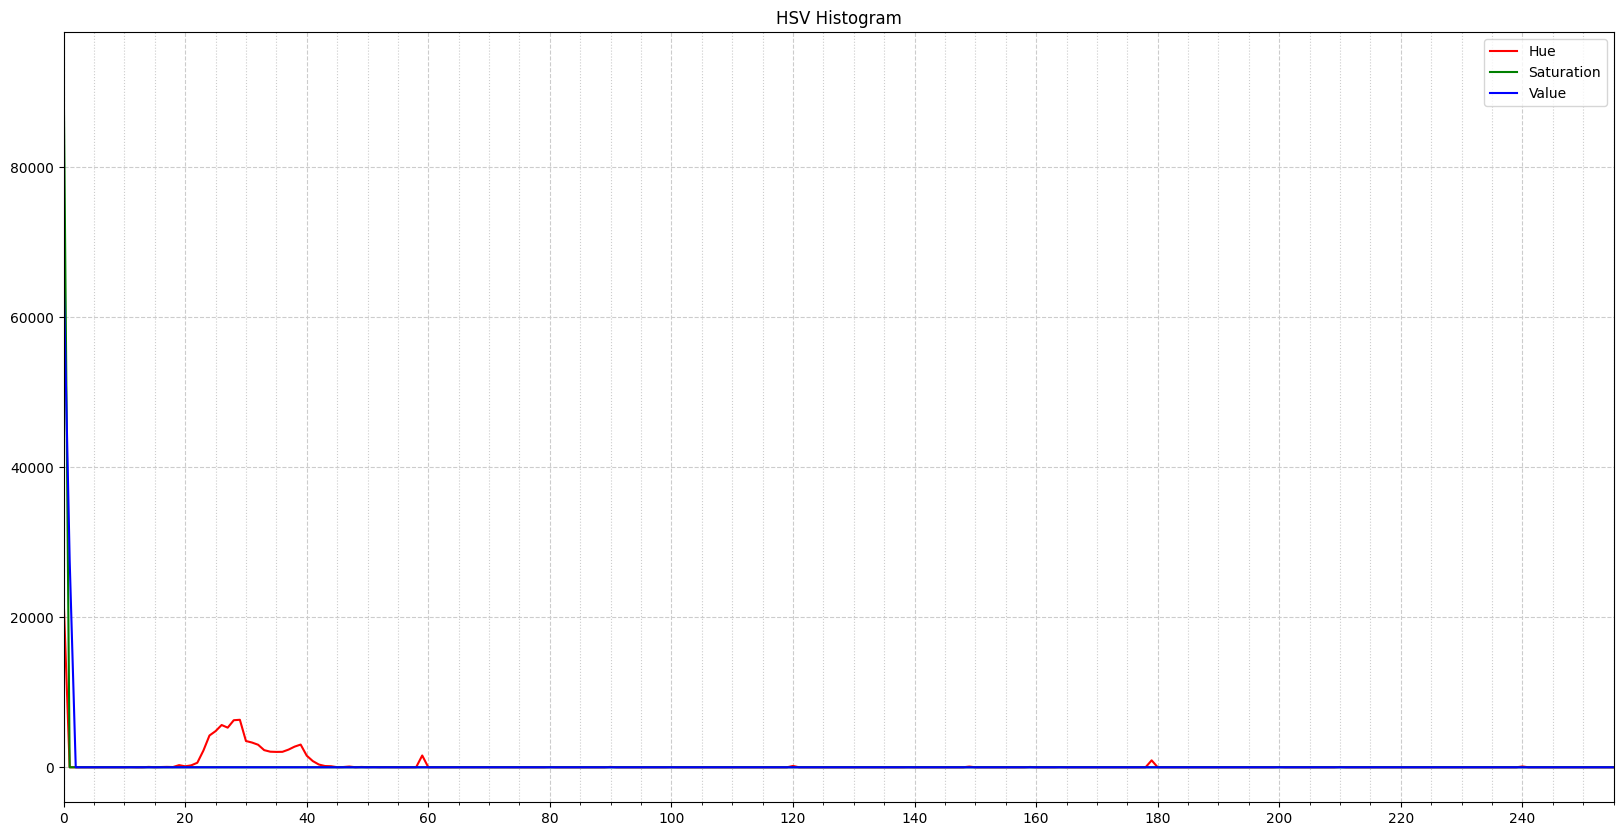

In [69]:
ShowHistogram(image_hsv, Title = "HSV Histogram", ChannelList = ["Hue", "Saturation", "Value"])

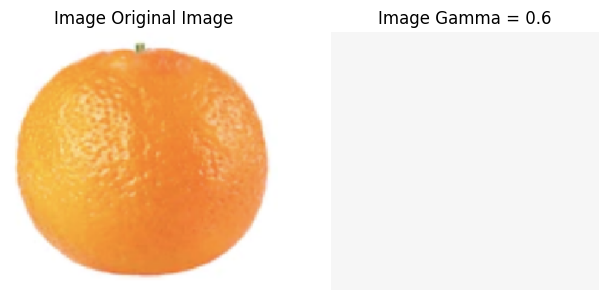

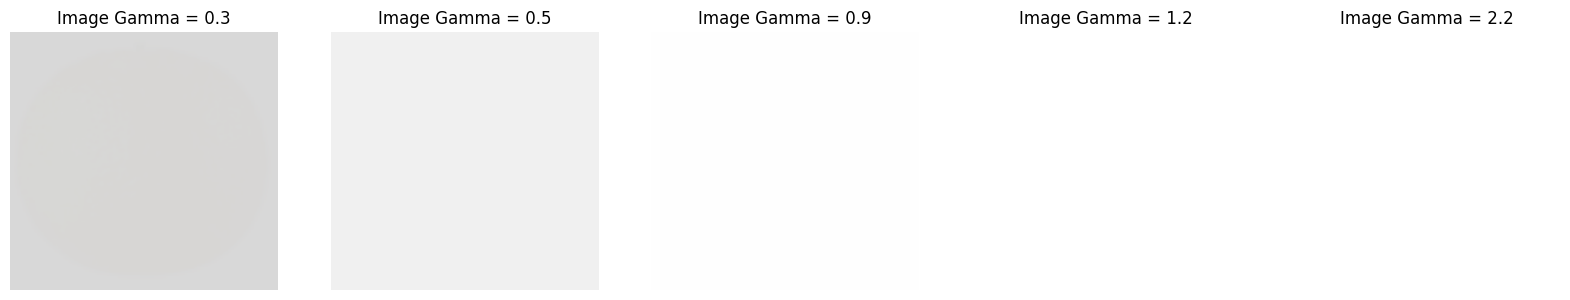

In [71]:
AnImage_Gamma = IntensityTransformation(AnImage, gamma = 0.6, display = 1)

In [72]:
hue = image_hsv[:,:,0]
saturation = image_hsv[:,:,1]
value = image_hsv[:,:,2]

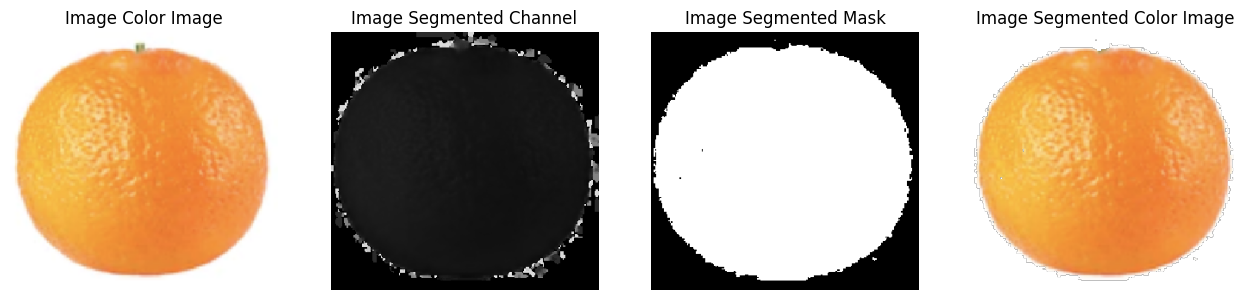

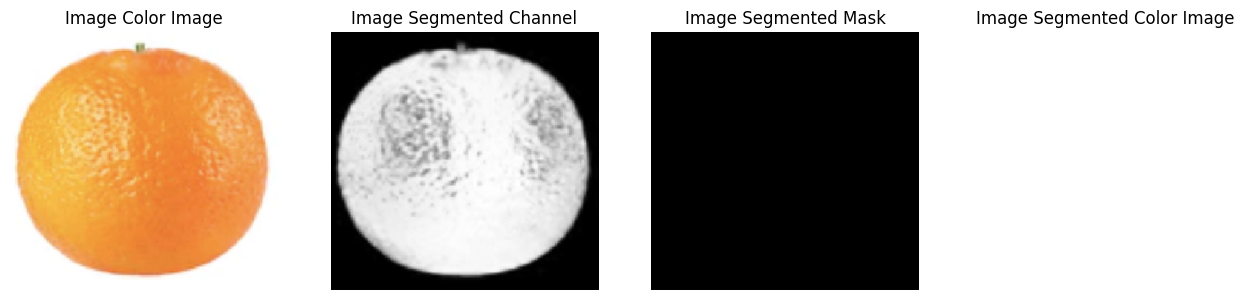

In [73]:
image_mask_bythresh1 = SegmentByThresh(AnImage, hue, segment_range = [14, 45])
image_mask_bythresh2 = SegmentByThresh(AnImage, saturation, segment_range = [70, 255])

In [79]:
image_mask_byauto1 = SegmentByThresh(AnImage, image_hsv[:,:,0])
image_mask_byauto2 = SegmentByThresh(AnImage, image_hsv[:,:,1])

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1555: error: (-2:Unspecified error) in function 'double __cdecl cv::threshold(const class cv::_InputArray &,const class cv::_OutputArray &,double,double,int)'
> THRESH_OTSU mode:
>     'src_type == CV_8UC1 || src_type == CV_16UC1'
> where
>     'src_type' is 5 (CV_32FC1)


C:\Users\theda\AppData\Local\Temp\ipykernel_2240\36495069.py:44: UserWarning: Input image is entirely zero, no valid convex hull. Returning empty image
  im_convexhull = convex_hull_image(image_mask == 1)


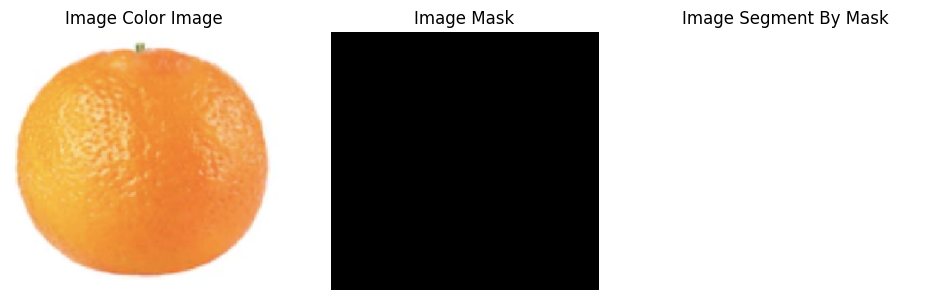

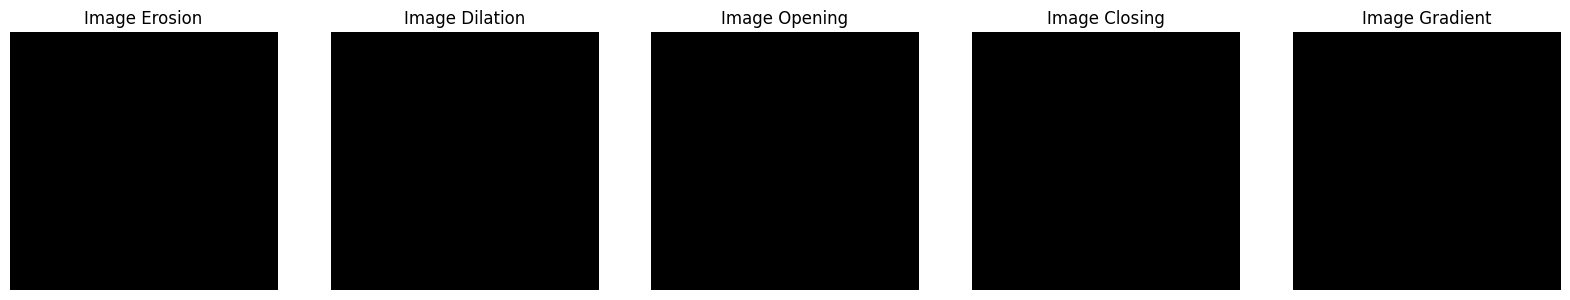

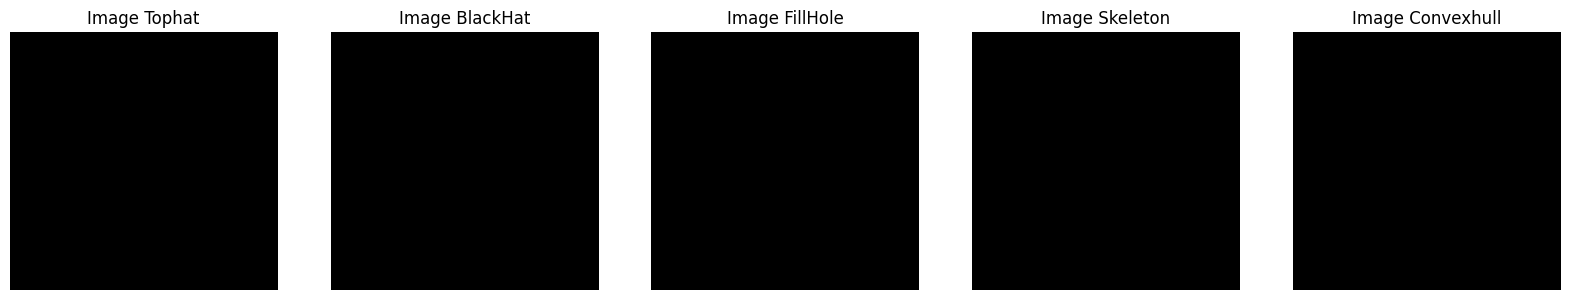

In [80]:
image_mask_bythresh = image_mask_bythresh2.copy()
image_mask_adjust = Morphology(AnImage, image_mask_bythresh, morType = "fillhole", size = 2, display = 1)

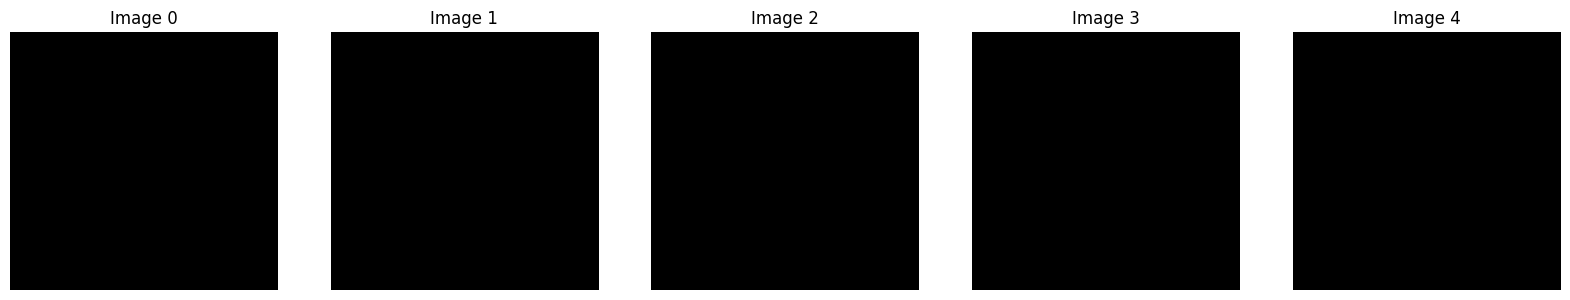

In [81]:
image_mask_adjust = doCoconutMaskSegment2(AnImage, image_mask_bythresh, display = 1)

In [82]:
image_mask = image_mask_adjust.copy()
result = GenerateOutput(AnImage, image_mask, FilePath = FileNameList[0], SaveFolderPath = "Coconuts (Output)")
(image_output_rgbmask, image_output_fill, image_output_bbox, image_output_boundary, DemoImage) = result

ShowImage([DemoImage], 1, 3)

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 2, the array at index 0 has size 3 and the array at index 1 has size 4

## 2/ Thực hiện trích các đặc trưng màu sắc, kích thước, hình dạng v.v… để thành lập 1 table có 2 lớp là fresh và rotten 

## 3/ Áp dụng 1 thuật toán MLs để học và phân loại giữa trái cam fresh và rotten 